In [1]:
!pip install --upgrade moviepy
!pip install torch torchvision torchaudio

In [2]:
import json
import os
from moviepy.editor import *
from moviepy import *

In [3]:
%cd C:\Users\user\Desktop\video-classification-3d-cnn-pytorch

C:\Users\user\Desktop\video-classification-3d-cnn-pytorch


In [4]:
def loadVideosToInfile1(folder):
    videos = os.listdir(folder)
    with open('input1', 'w') as inputfile:
        for v in videos:
            if v.split('.')[-1] == 'mp4':
                inputfile.write(v+'\n')
loadVideosToInfile1('../scrap0')

In [5]:
def loadVideosToInfile2(folder):
    videos = os.listdir(folder)
    with open('input2', 'w') as inputfile:
        for v in videos:
            if v.split('.')[-1] == 'mp4':
                inputfile.write(v+'\n')
loadVideosToInfile2('../scrap1')

In [6]:
!python main.py --input input1 --video_root ../scrap0 --output ../output_features1.json --model resnet-34-kinetics-cpu.pth --mode feature --no_cuda

loading model resnet-34-kinetics-cpu.pth
../scrap0\apartments-dont-kill-people.mp4


ffmpeg version 2023-11-13-git-67a2571a55-essentials_build-www.gyan.dev Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 12.2.0 (Rev10, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --pkg-config=pkgconf --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-mediafoundation --enable-libass --enable-libfreetype --enable-libfribidi --enable-libharfbuzz --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-dxva2 --enable-d3d11va --enable-libvpl --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-li

In [7]:
!python main.py --input input2 --video_root ../scrap1 --output ../output_features2.json --model resnet-34-kinetics-cpu.pth --mode feature --no_cuda

ffmpeg version 2023-11-13-git-67a2571a55-essentials_build-www.gyan.dev Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 12.2.0 (Rev10, Built by MSYS2 project)
  configuration: --enable-gpl --enable-version3 --enable-static --pkg-config=pkgconf --disable-w32threads --disable-autodetect --enable-fontconfig --enable-iconv --enable-gnutls --enable-libxml2 --enable-gmp --enable-bzlib --enable-lzma --enable-zlib --enable-libsrt --enable-libssh --enable-libzmq --enable-avisynth --enable-sdl2 --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libaom --enable-libopenjpeg --enable-libvpx --enable-mediafoundation --enable-libass --enable-libfreetype --enable-libfribidi --enable-libharfbuzz --enable-libvidstab --enable-libvmaf --enable-libzimg --enable-amf --enable-cuda-llvm --enable-cuvid --enable-ffnvcodec --enable-nvdec --enable-nvenc --enable-dxva2 --enable-d3d11va --enable-libvpl --enable-libgme --enable-libopenmpt --enable-libopencore-amrwb --enable-li

loading model resnet-34-kinetics-cpu.pth
../scrap1\it-sweet-of-i-heard-in-the-shed-before.mp4
../scrap1\its-perfect.mp4
../scrap1\kind-of-work-girls-do.mp4
../scrap1\let-out-let-out-of-there.mp4
../scrap1\miss-moneypenny.mp4
../scrap1\what-done-your-daughter-doesnt-come-cheap.mp4


In [8]:
file = open('../output_features2.json')
segments = json.load(file)
len(segments)

6

In [9]:
for s in segments: print(s['video'])

it-sweet-of-i-heard-in-the-shed-before.mp4
its-perfect.mp4
kind-of-work-girls-do.mp4
let-out-let-out-of-there.mp4
miss-moneypenny.mp4
what-done-your-daughter-doesnt-come-cheap.mp4


In [10]:
print(segments[0]['clips'][0].keys())

dict_keys(['segment', 'features'])


In [11]:
import numpy as np
import json

In [12]:
file1 = open('C:\\Users\\user\\Desktop\\output_features1.json')
segments1 = json.load(file1)
file2 = open('C:\\Users\\user\\Desktop\\output_features2.json')
segments2 = json.load(file2)

In [13]:
film1Features = []
for s in segments1[0]['clips']:
    film1Features.append(np.array(s['features']))

In [14]:
def find_best_range(films, sample_film_features):
    best_range_info = {
        'start': 0,
        'score': 100000000,
        'filmX_index': -1  
    }

    for filmX_index, filmX in enumerate(films):
        filmX_features = []
        for s in filmX['clips']:
            filmX_features.append(np.array(s['features']))

        for i in range(len(filmX_features) - len(sample_film_features)):
            distance = 0
            for j in range(len(sample_film_features)):
                d = np.linalg.norm(filmX_features[i + j] - sample_film_features[j])
                distance += d

            if distance < best_range_info['score']:
                best_range_info['start'] = i
                best_range_info['score'] = distance
                best_range_info['filmX_index'] = filmX_index

    return best_range_info

best_range_info = find_best_range(segments2, film1Features)
print(f"Best Range Start: {best_range_info['start']}")
print(f"Best Range Score: {best_range_info['score']}")
print(f"Best Range belongs to Film Index: {best_range_info['filmX_index']}")

Best Range Start: 10
Best Range Score: 159.07908214117566
Best Range belongs to Film Index: 0


In [17]:
from IPython.display import Video
from moviepy.editor import VideoFileClip

def exportXVideo(XVideo, Samfeatures, best_range_info):
    tsfps = XVideo.fps
    tsFrameLength = 1 / tsfps
    nrFrames = len(Samfeatures) * 16
    startFrame = best_range_info['start'] * 16

    startTime = max(0, startFrame * tsFrameLength)
    endTime = min(XVideo.duration, startTime + nrFrames * tsFrameLength)
    try:
        X_Matched_sample_Video = XVideo.subclip(startTime, endTime)
        X_Matched_sample_Video.ipython_display()
        X_Matched_sample_Video.close()  # 显式关闭显示
        X_Matched_sample_Video.write_videofile("C:\\Users\\user\\Desktop\\Theoutputs\\output_video.mp4", audio_codec='aac', codec='libx264')
    except Exception as e:
        print(f"Fail: {e}")
    return X_Matched_sample_Video

XVideo = VideoFileClip("../scrap1/its-perfect.mp4")
Samfeatures = film1Features
best_range_info = best_range_info
X_Matched_sample_Video = exportXVideo(XVideo, Samfeatures, best_range_info)

Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
Moviepy - Building video C:\Users\user\Desktop\Theoutputs\output_video.mp4.
Moviepy - Writing video C:\Users\user\Desktop\Theoutputs\output_video.mp4



Moviepy - Done !
Moviepy - video ready C:\Users\user\Desktop\Theoutputs\output_video.mp4


In [18]:
#Yeah it failed but somehow the latter part still works, Maybe that's because the video duration is not long enough
X_Matched_sample_Video.duration

5.336666666666666

In [19]:
frame = X_Matched_sample_Video.get_frame(1)

In [20]:
from PIL import Image

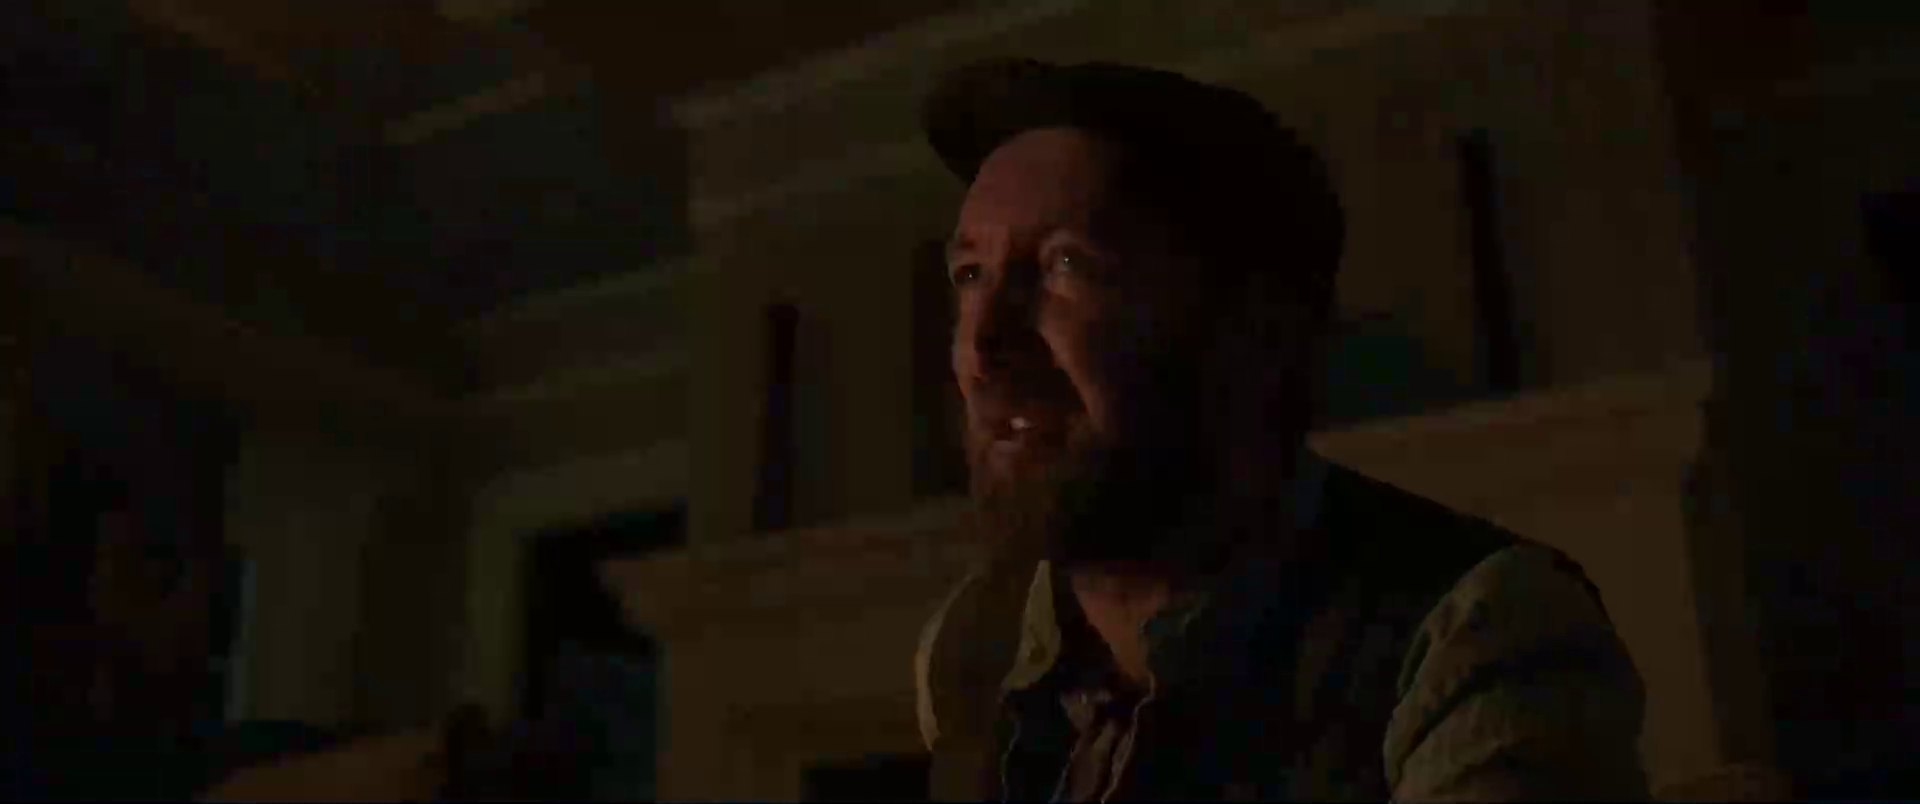

In [21]:
Image.fromarray(frame,'RGB')